# Data analysis: Velib

Author: O. Roustant, INSA Toulouse. January 2021.


We consider the ‘Vélib’ data set, related to the bike sharing system of Paris. The data are loading profiles of the bike stations over one week, collected every hour, from the period Monday 2nd Sept. - Sunday 7th Sept., 2014. The loading profile of a station, or simply loading, is defined as the ratio of number of available bikes divided by the number of bike docks. A loading of 1 means that the station is fully loaded, i.e. all bikes are available. A loading of 0 means that the station is empty, all bikes have been rent.

From the viewpoint of data analysis, the individuals are the stations. The variables are the 168 time steps (hours in the week). The aim is to detect clusters in the data, corresponding to common customer usages. This clustering should then be used to predict the loading profile.

In [3]:
rm(list = ls())   # erase everything, start from scratch!

# load the data from package funFEM

library(funFEM)
library(FactoMineR)
library(factoextra)
data(velib)
help("velib")

Loading required package: MASS

Loading required package: fda

Loading required package: splines

Loading required package: Matrix

Loading required package: fds

Loading required package: rainbow

Loading required package: pcaPP

Loading required package: RCurl


Attaching package: 'fda'


The following object is masked from 'package:graphics':

    matplot


Loading required package: elasticnet

Loading required package: lars

Loaded lars 1.2


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [4]:
# data preparation
x <- as.matrix(velib$data)
colnames(x) <- 1:ncol(x)
rownames(x) <- velib$names

n <- nrow(x)
stations <- 1:n 
coord <- velib$position[stations,]

# select exactly 7 days of data (we remove the first 13 dates)
dates <- 14:181
x <- x[stations, dates]
colnames(x) <- 1:length(dates)

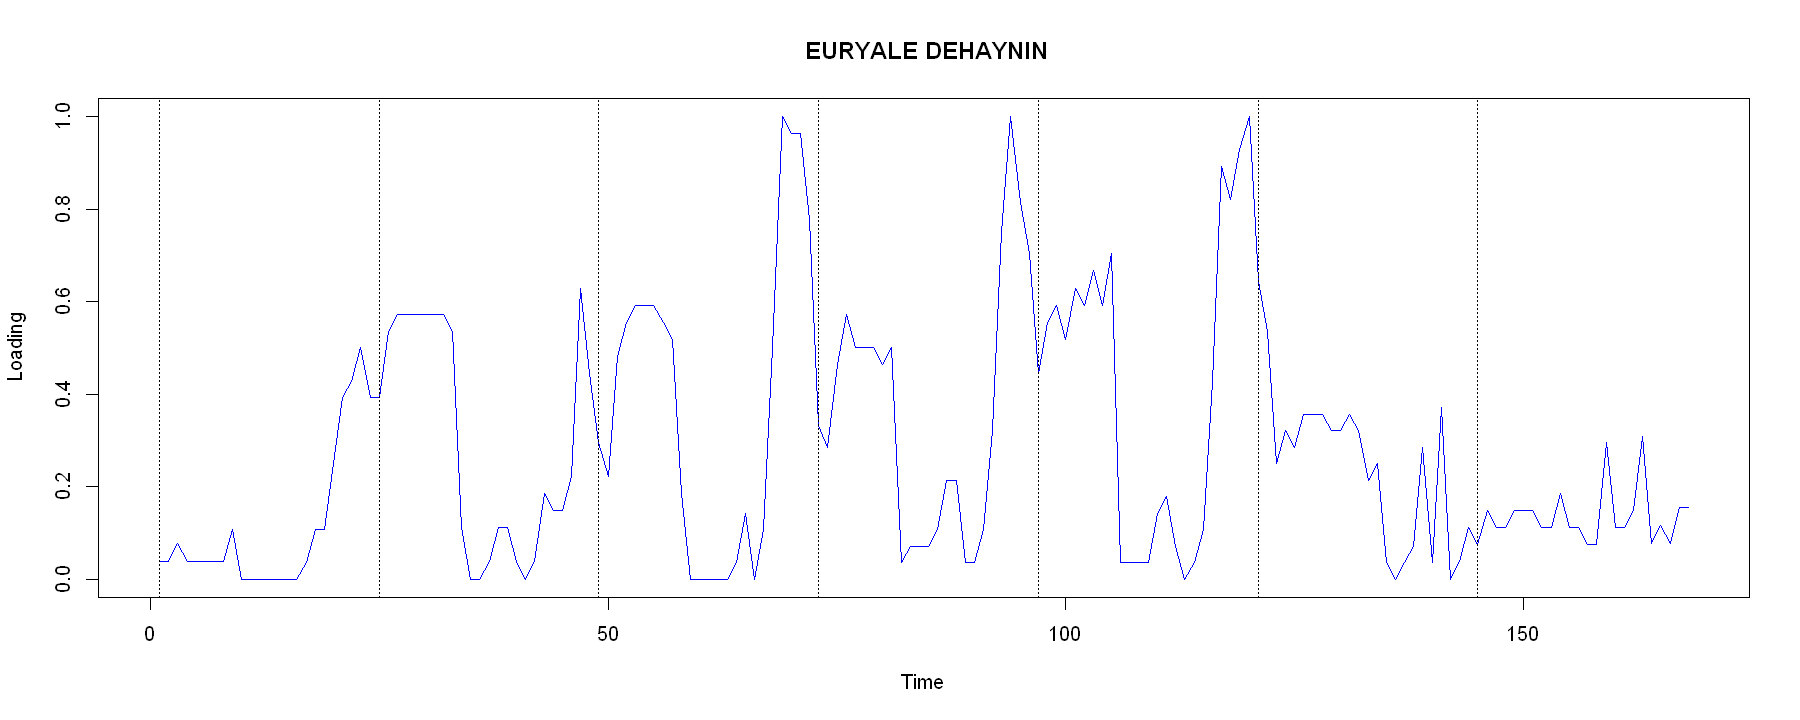

In [5]:
timeTick <- 1 + 24*(0:6)  # vector corresponding to the beginning of days
par(mfrow = c(1, 1))

options(repr.plot.width = 15, repr.plot.height = 6)

plot(x[1, ], col = "blue", type = "l", ylim = c(0, 1), 
     xlab = "Time", ylab = "Loading", main = rownames(x)[1])
abline(v = timeTick, lty = "dotted")


In [6]:
# From now on, we use numbers instead of station names, 
# in order to simplify printing
rownames(x) <- 1:nrow(x)

# 1. Principal Component Analysis

Pas besoin de normaliser les données, elles sont déjà centrées. <br>
Toutefois, la PCA de FactoMineR normalise les données par défaut, on doit donc faire attention.

In [7]:
PCA.out=PCA(x,scale.unit=FALSE)

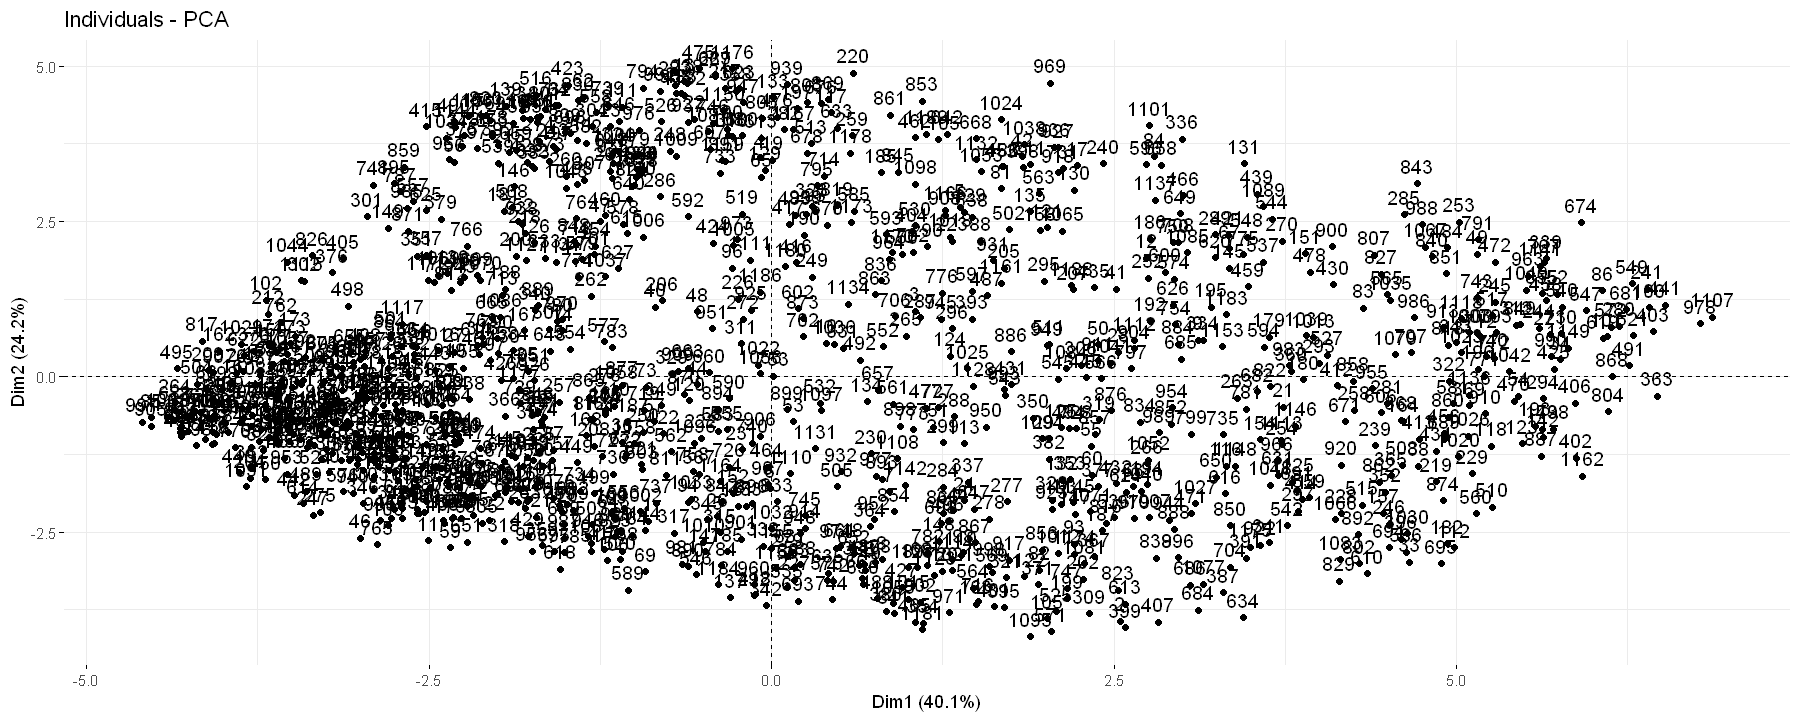

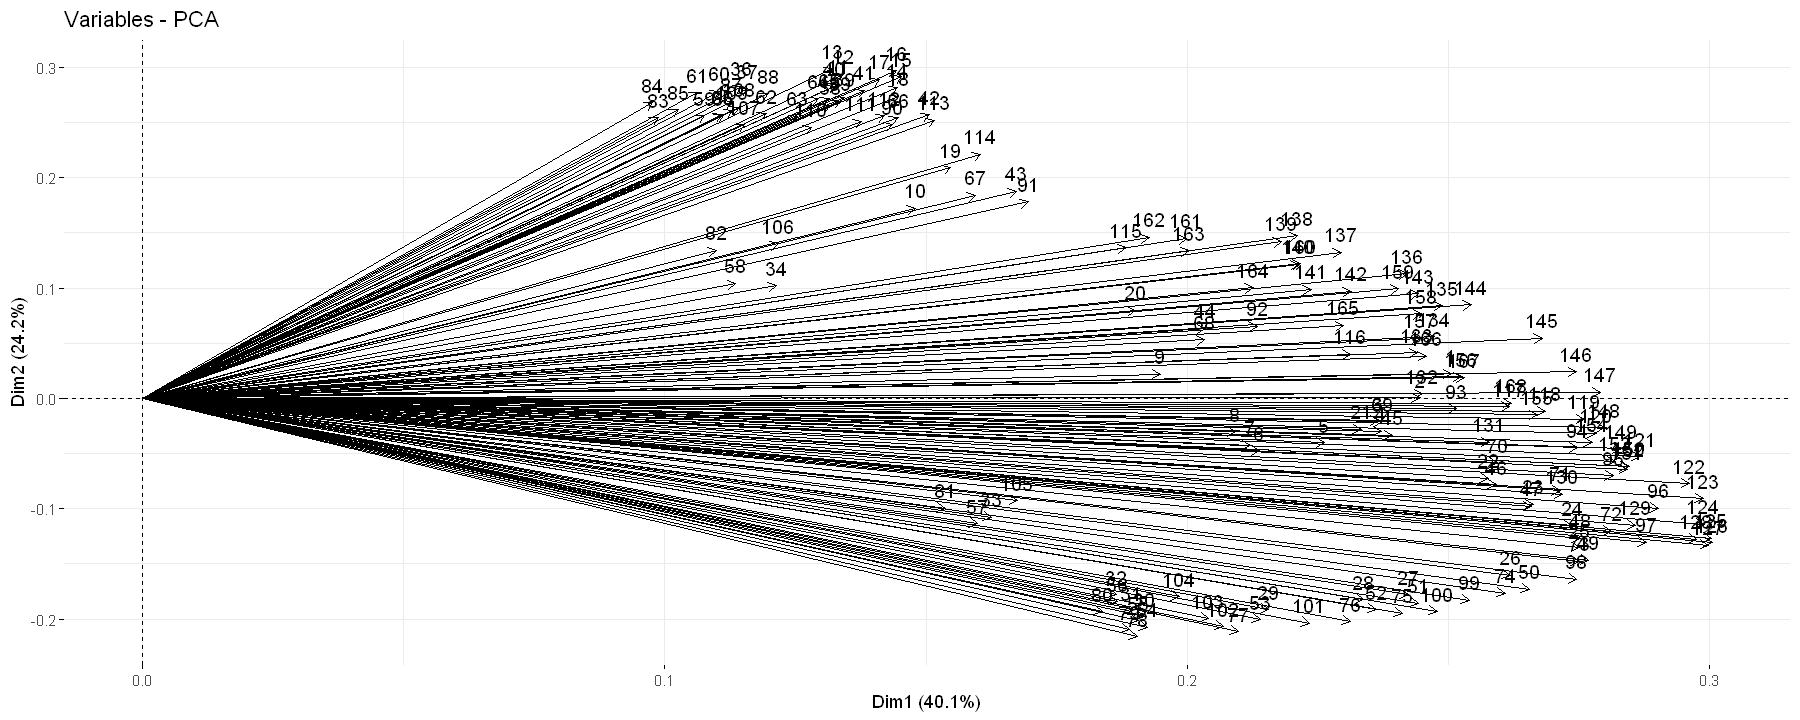

In [8]:
par(mfrow = c(1, 2))
fviz_pca_ind(PCA.out)
fviz_pca_var(PCA.out)

>***Interpretation <br>
Axe des abscisses = dimension 1 <br>
Axe des ordonnées = dimension 2 <br>


Warning message:
"ggrepel: 1148 unlabeled data points (too many overlaps). Consider increasing max.overlaps"
Warning message:
"ggrepel: 162 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


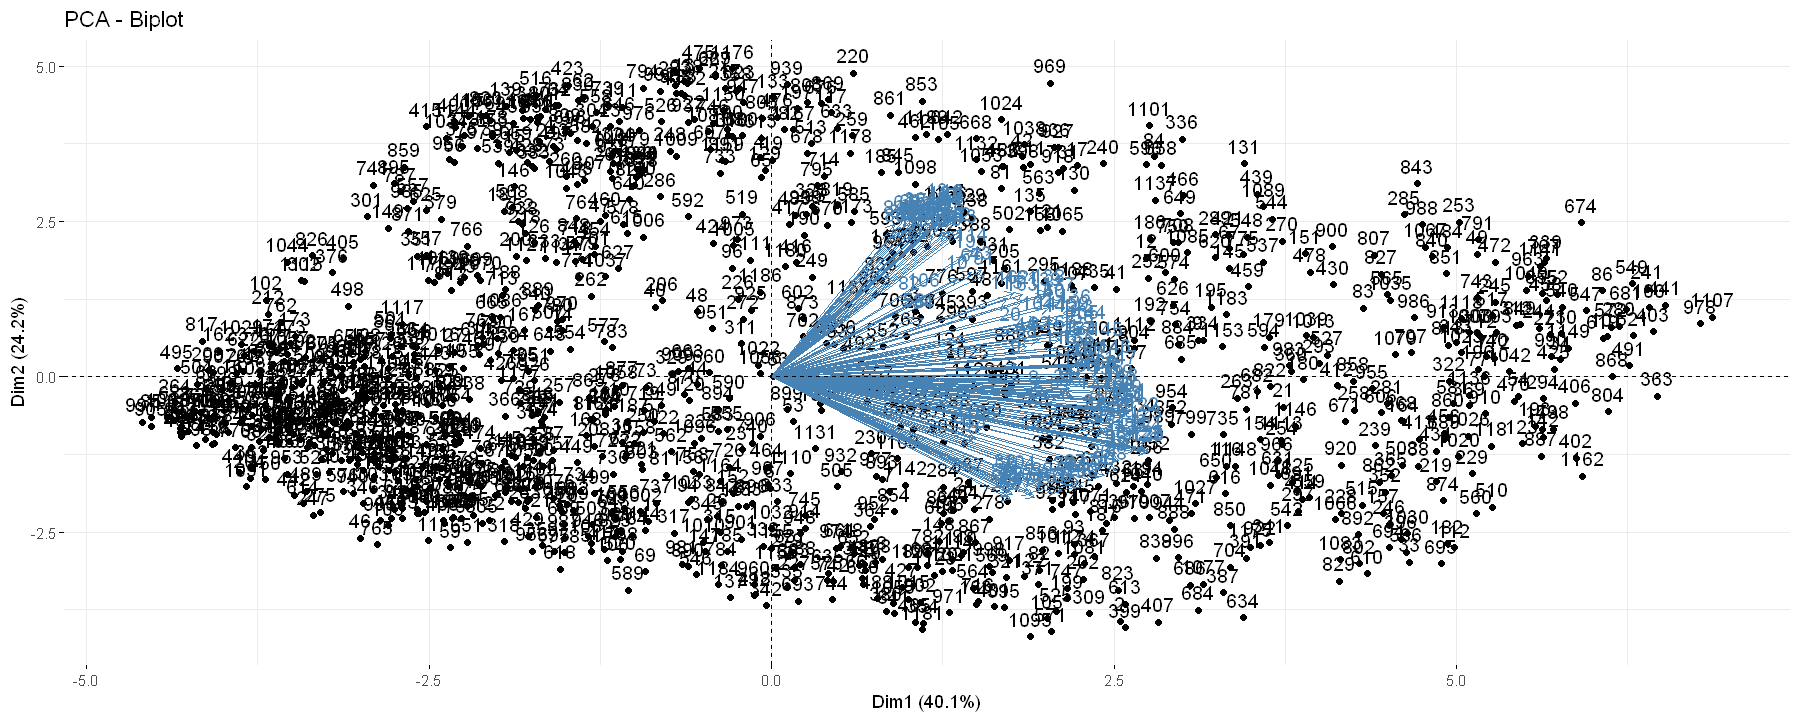

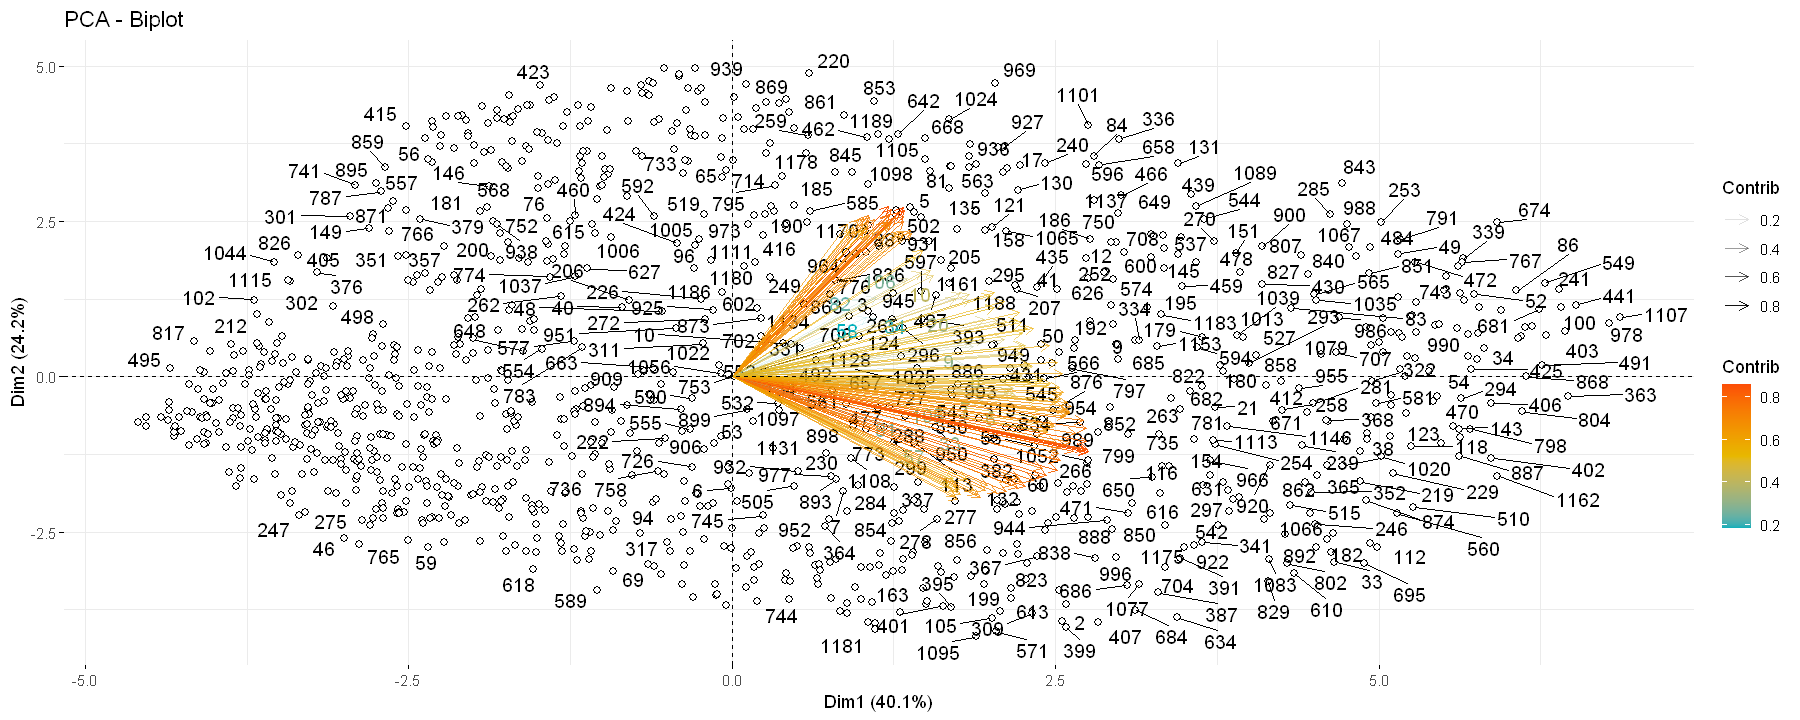

In [29]:
fviz_pca_biplot(PCA.out)
fviz_pca_biplot (PCA.out, repel=TRUE,
        # Individus
        col.ind = "black",
         pointshape = 21, pointsize = 2,
         # Variables
        alpha.var ="contrib", col.var = "contrib",
        gradient.cols = c("#00AFBB","#E7B800","#FC4E07"),
        legend.title = list(color ="Contrib",alpha = "Contrib"))

# 2. Eigenvalues

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,7.9730841,40.0716665,40.07167
comp 2,4.8089597,24.1691954,64.24086
comp 3,1.0215417,5.1341333,69.37500
comp 4,0.8574387,4.3093735,73.68437
comp 5,0.6236212,3.1342376,76.81861
comp 6,0.3739460,1.8794034,78.69801
comp 7,0.3280678,1.6488254,80.34684
comp 8,0.3134050,1.5751322,81.92197
comp 9,0.2507254,1.2601126,83.18208
comp 10,0.2283967,1.1478914,84.32997


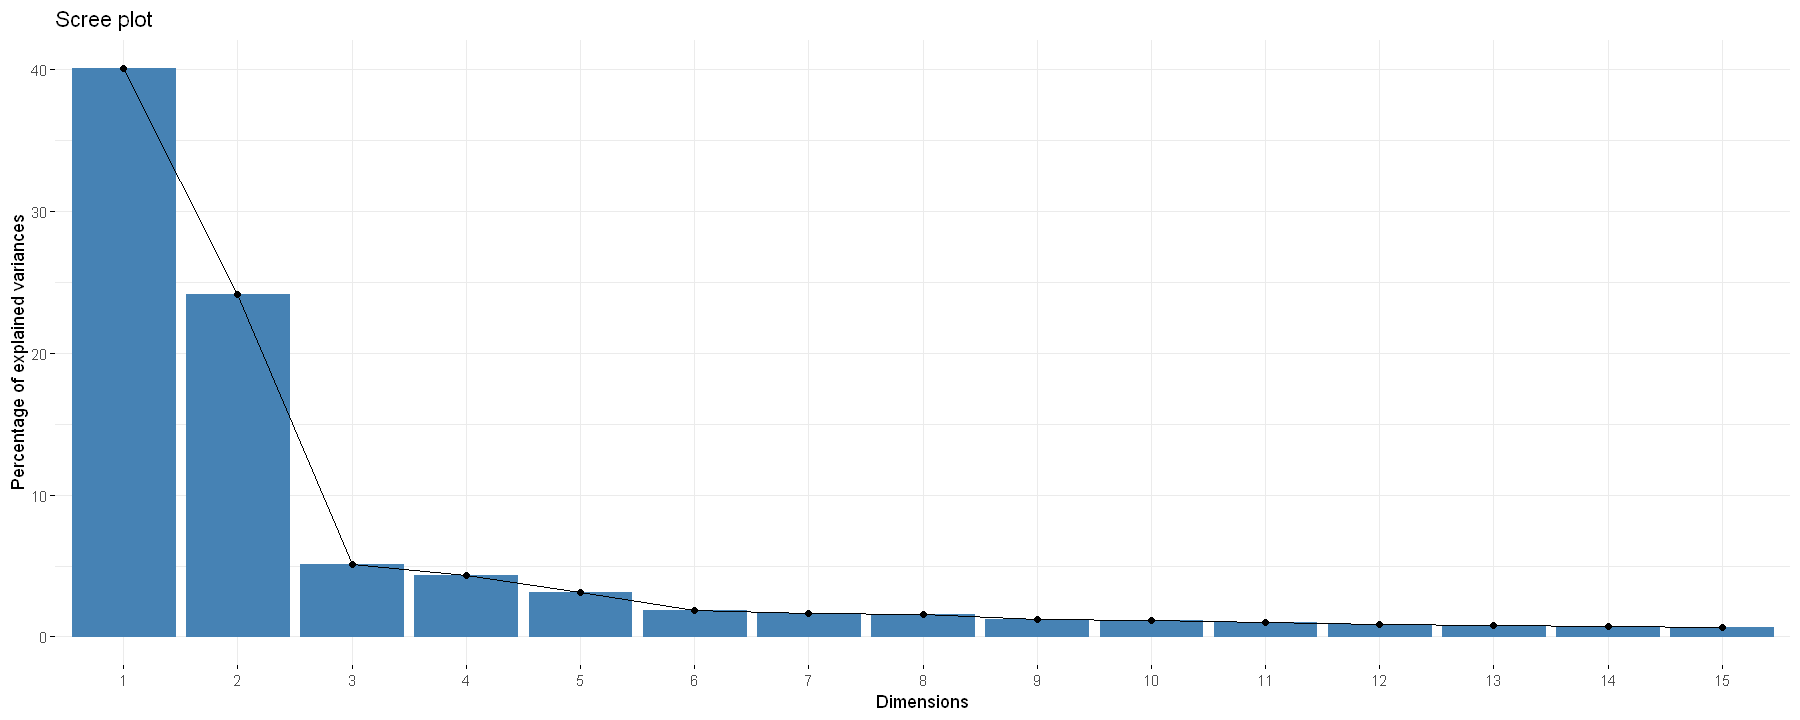

In [17]:
PCA.out$eig[0:15,]
fviz_eig(PCA.out,ncp=15)

> Interprétation <br>
1. Sortie sur les valeurs propres: <br>
La première composante principale explique 40% de la variance des données, la 2e 23%,... <br>
On retient les 8 premières composantes principales pour pouvoir expliquer 80% de la variance totale des données. <br>
2. Scree plot : <br>
On voit que les 2 premières composantes expliquent la majorité de la variance 63%. <br>
Un coude est visible entre les composantes 2 et 3 / 5 et 6. La graphe nous incite à ne garder que les 3 premières ou les 6 premières composantes principales ?


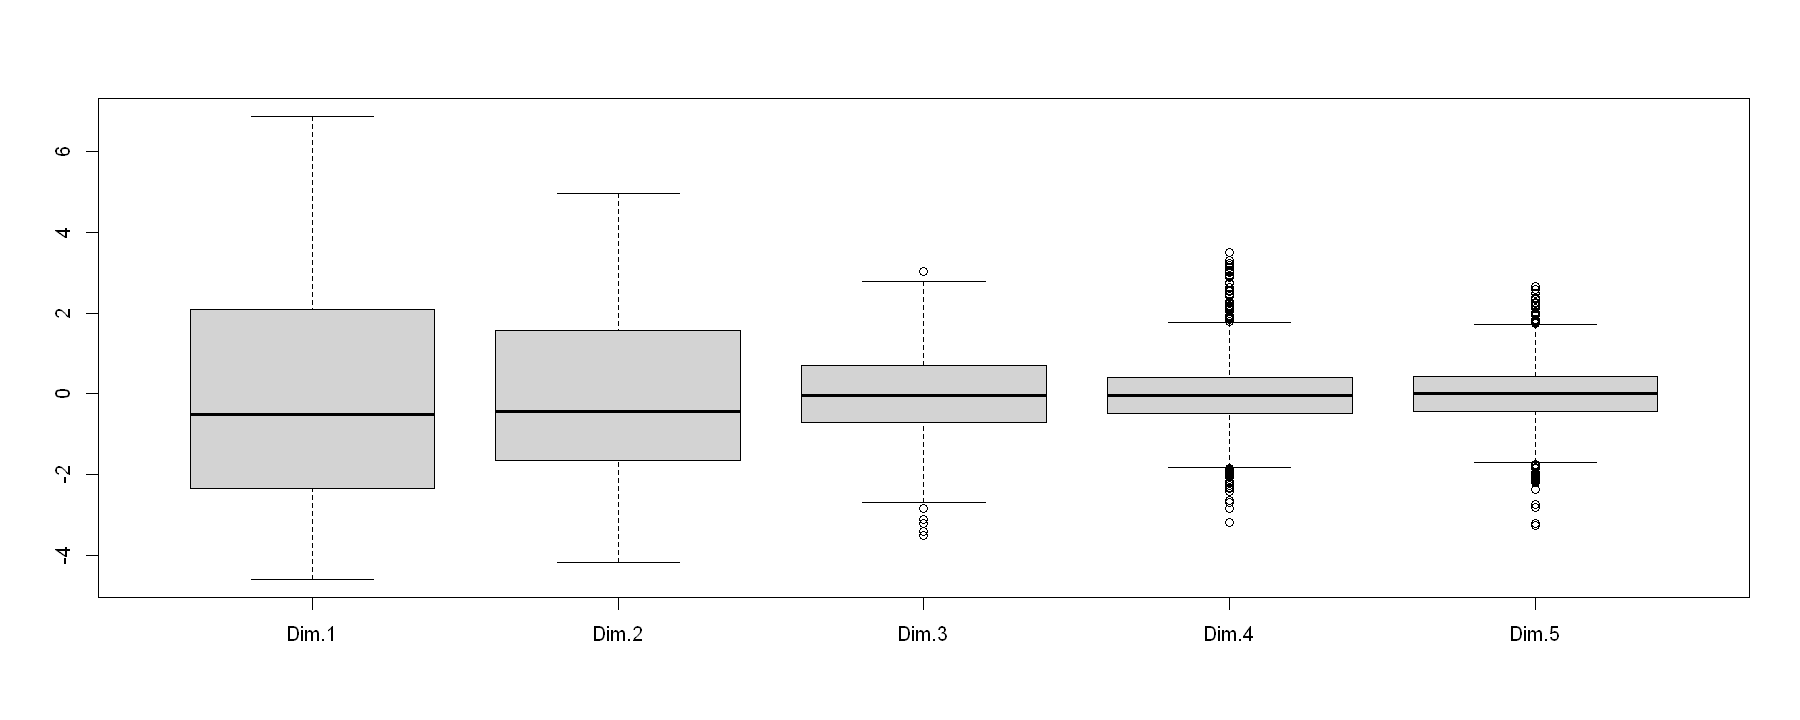

In [25]:
boxplot(PCA.out$ind$coord)

# 3. Bonus variable : Hill or NoHill

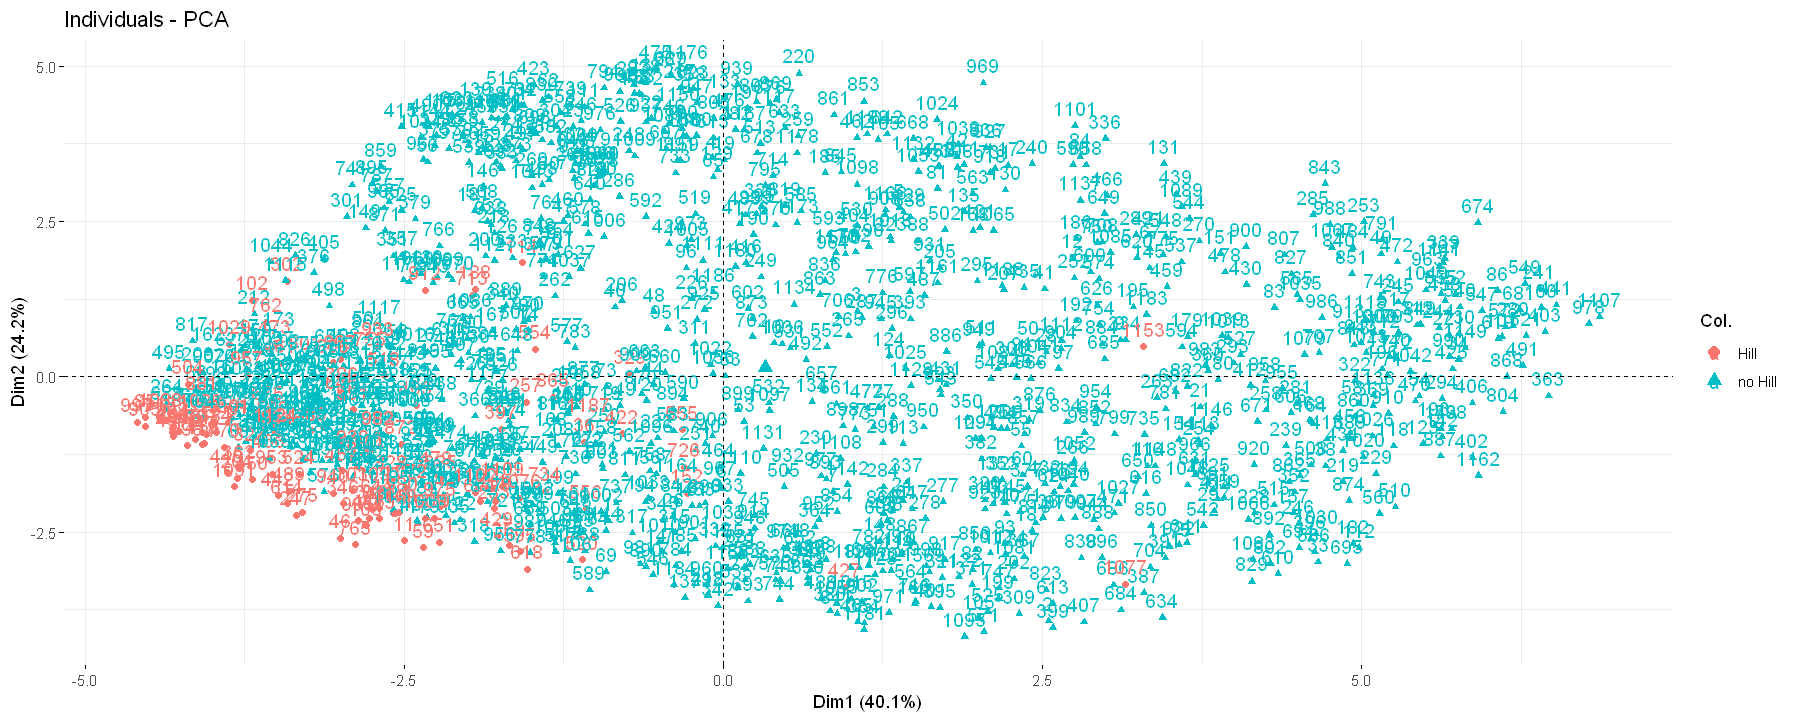

In [38]:
fviz_pca_ind(PCA.out,col.ind=ifelse(velib$bonus == 1,"Hill","no Hill"))

# Principal component analysis

Some ideas :

1. Perform a PCA with package FactoMineR. Should the data be scaled?
2. Plot the percentage of variance explained by the first 15 components, as well as a boxplot of the coordinates of the indivuals on the 15 first principal axis. How many components can be kept?


3. Plot the coordinates of the first 4 principal components on different graphs. Interpret the result (remember that the original variables are time steps).


4. Plot the circle of correlation. Interpret the result.
5. Plot the individuals on the plan spanned by the first two coordinates. Interpret the result.
6. Add the information brought by the variable qualitative variable 'bonus', indicating whether a station is located on a hill or not. In particular, where are located these stations on the graph of individuals? Is it surprising?
7. Implement questions 1-6 in Python. For that, you can have a look at the notebook on MARS, of https://github.com/wikistat/Exploration/